In [2]:
!pip install pandas matplotlib seaborn

In [6]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
import pandas as pd

# Reload the dataset in case it's messed up
df = pd.read_csv("netflix_titles.csv")

# Drop only rows where 'date_added' is missing
df = df.dropna(subset=['date_added'])

# Convert 'date_added' to datetime (ignore errors if format is bad)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows where date couldn't be converted (just in case)
df = df.dropna(subset=['date_added'])

# Create new column 'year_added'
df['year_added'] = df['date_added'].dt.year

# Show sample
df[['title', 'date_added', 'year_added']].head()


,title,date_added,year_added
0,Dick Johnson Is Dead,2021-09-25,2021
1,Blood & Water,2021-09-24,2021
2,Ganglands,2021-09-24,2021
3,Jailbirds New Orleans,2021-09-24,2021
4,Kota Factory,2021-09-24,2021


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')  # for clean look


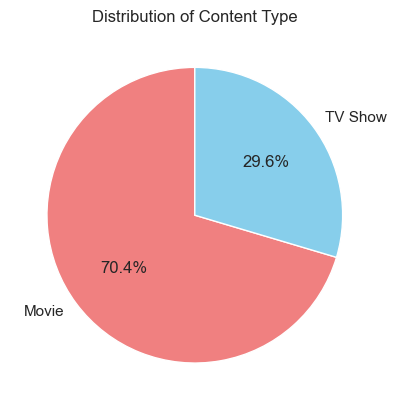

In [19]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribution of Content Type')
plt.ylabel('')
plt.show()


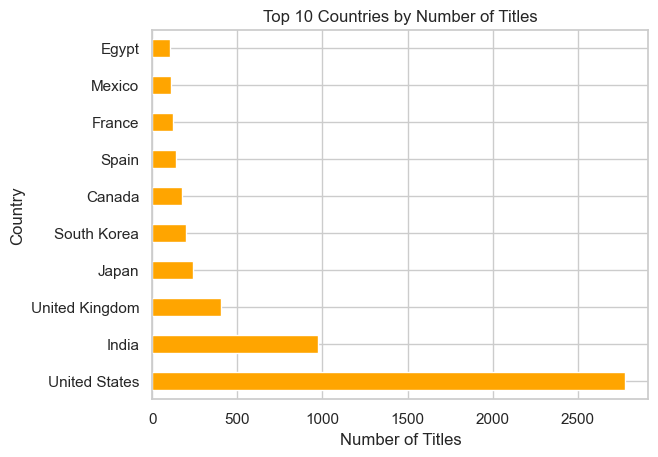

In [20]:
df['country'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


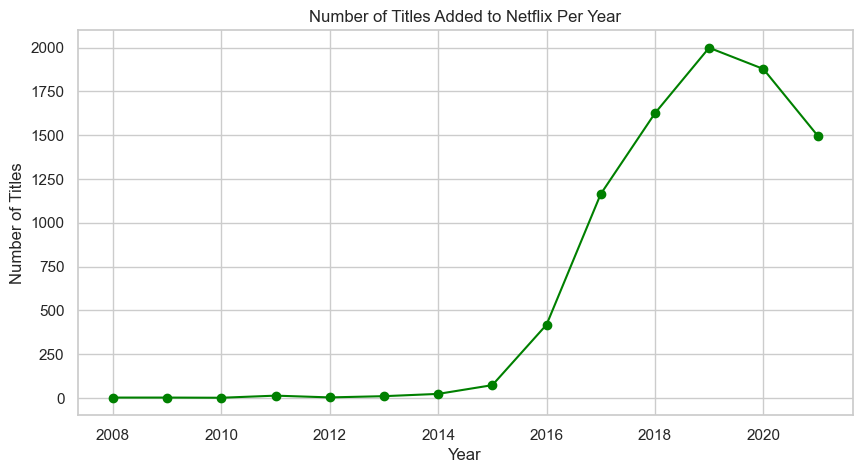

In [21]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='green', figsize=(10, 5))
plt.title("Number of Titles Added to Netflix Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


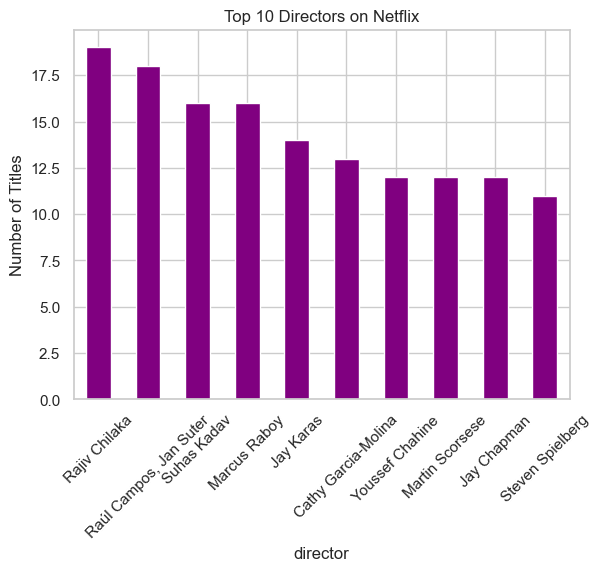

In [22]:
df['director'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


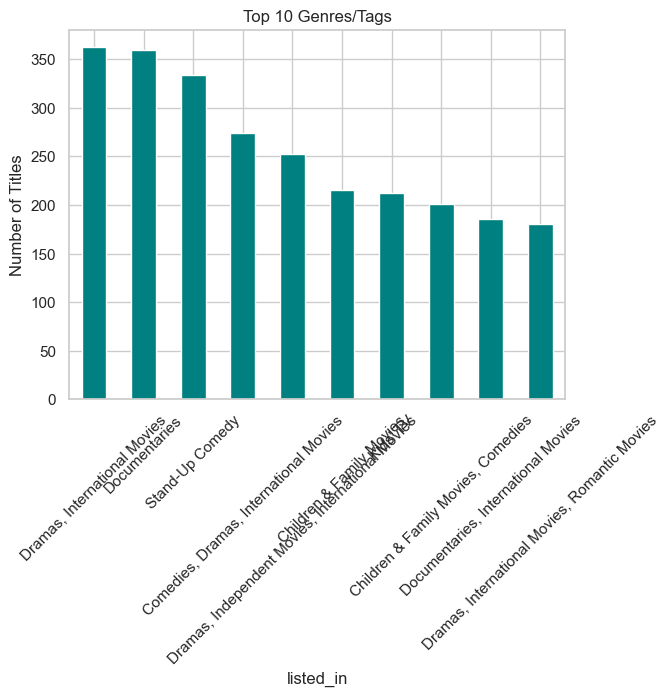

In [23]:
df['listed_in'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Genres/Tags")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()
